In [ ]:
from pandas.core.common import random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Here we will set the theme and a seed for randomization consistency.
sns.set()
rand_state=1000
sns.set_palette("Spectral")

#Credit Card Default EDA

#Importing data & Variable Transformation



In [ ]:
# Bringing in the data
df = pd.read_csv("UCI_Credit_Card.csv")
#The first thing we want to do is take a look at the data.
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#looking at the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#rename some column names
df.rename(columns = {'default.payment.next.month':'default','BILL_AMT1':'BILL1', 'BILL_AMT2':'BILL2','BILL_AMT3':'BILL3', 
                     'BILL_AMT4':'BILL4', 'BILL_AMT5':'BILL5', 'BILL_AMT6':'BILL6', 'PAY_0':'PAY_1'}, inplace = True)

##Analyzing observation completeness 

In [ ]:
#Looking for missingness by summing the NA's
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL1        0
BILL2        0
BILL3        0
BILL4        0
BILL5        0
BILL6        0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [ ]:
# replace the spaces and seeing if there is any missingness
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL1        0.0
BILL2        0.0
BILL3        0.0
BILL4        0.0
BILL5        0.0
BILL6        0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
dtype: float64

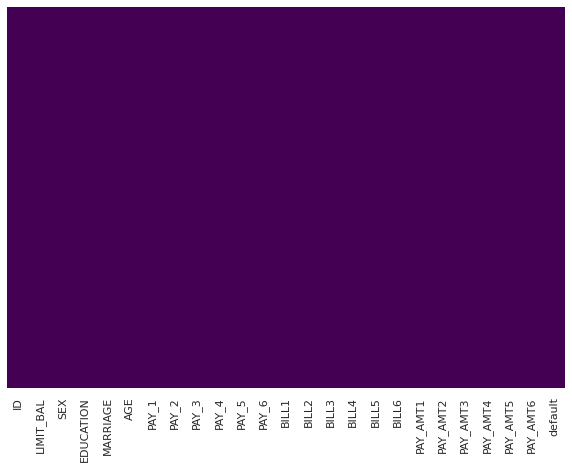

In [ ]:
#Visualising the missingness
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In addition to the numeric count of missingness after we replaces spaces with NA's there is no visual indicator we are missing any data. We see that there is no yellow showing in the plot, which indicates that there is no missingness in our data. 

##Adjusting variable ranges

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Looks like marriage has values at 0, which should be the same as our "other" category 3

Same thing for education, where 0, 5, and 6 can all collapse to the value of 4 since we don't think that "unknown" and "other" are informative as separate categories

The source data also says each PAY_X variable should have a range from -1 to 9, so we need to add 1 to each variable 

In [ ]:
#set all marriage values at 0 equal to 3
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

In [ ]:
#set 0 and 6 education valus to 5 (other)
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0,5,6] else x)

In [ ]:
pay = ['PAY_1','PAY_2','PAY_3','PAY_4', 'PAY_5', 'PAY_6']
for i in pay:  
  df[i]=df[i]+1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,0.983300,1.123802,-1.0,0.00,1.0,1.00,9.0
PAY_2,30000.0,0.866233,1.197186,-1.0,0.00,1.0,1.00,9.0
PAY_3,30000.0,0.833800,1.196868,-1.0,0.00,1.0,1.00,9.0
PAY_4,30000.0,0.779333,1.169139,-1.0,0.00,1.0,1.00,9.0


Now our variables have (what we assume to be) the correct range

##Change variable types


In [ ]:
# retyping our variables into categorical and numerics
categoricals = ['default','ID','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4', 'PAY_5', 'PAY_6']
numerics = ['BILL1','LIMIT_BAL','BILL2', 'BILL3','BILL4','BILL5','BILL6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',]

for col in categoricals:
    df[col]=df[col].astype("category")

for col in numerics:
  df[col] = pd.to_numeric(df[col], errors='coerce')
    


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,30000.0,30000.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIMIT_BAL,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,2.0,2.0,18112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,30000.0,4.0,2.0,14030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,30000.0,3.0,2.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,30000.0,56.0,29.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_1,30000.0,11.0,1.0,14737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,30000.0,11.0,1.0,15730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,30000.0,11.0,1.0,15764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,30000.0,11.0,1.0,16455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Save clean
df.to_csv('Credit_clean.csv',index=False) 

#Visualization


##Target variable: default

We can start by visualizing our target variable, default, in a few of our feature space classes. 

It's worth discussing now that our default payment refers to default in october, the month after september, even though we have data through April. It's possible some of these people only defaulted earlier than October, but are only counted as of then the way this data is structured

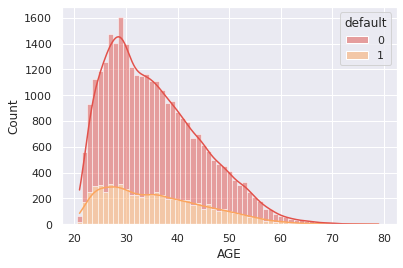

In [ ]:
sns.histplot(data=df, x = 'AGE' , hue = 'default',bins = 40, multiple="stack" , kde=True)

Most lending is concentrated in the 25-30 range. We also see that the number of defaults remains relatively similar even as the number of borrowers drops off steeply. 

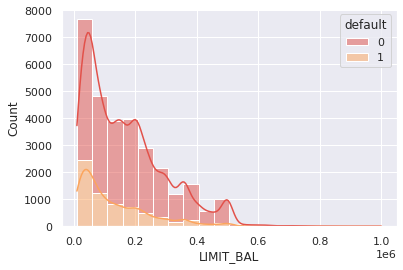

In [ ]:
sns.histplot(x = df['LIMIT_BAL'] , bins = 20, hue = df['default'] , multiple = 'stack',kde=True)

Defaults are much more likely at lower credit limits, which might infer that we're assigning those limits well

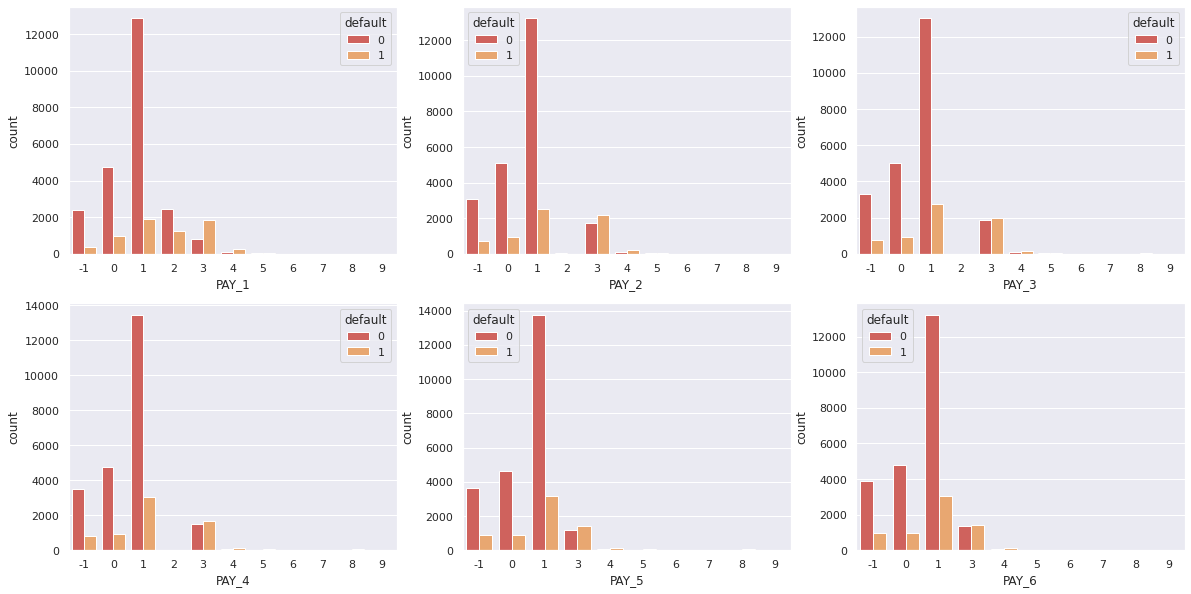

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
sns.countplot(data=df , x = "PAY_1" , hue='default')

plt.subplot(232)
sns.countplot(data=df , x = "PAY_2" , hue='default')

plt.subplot(233)
sns.countplot(data=df , x = "PAY_3" , hue='default')

plt.subplot(234)
sns.countplot(data=df , x = "PAY_4" , hue='default')

plt.subplot(235)
sns.countplot(data=df , x = "PAY_5" , hue='default')

plt.subplot(236)
sns.countplot(data=df , x = "PAY_6" , hue='default')



Our target variable measures if default occurs the next month, or in October 2005 since the last recorded month is September. 
We se that the probability of default also greatly increases with even 1 month delinquency, and is almost sure past 3 months as of September.


Plotting the number of defaults by repayment status across each month, we observe some interesting things:
*  There are suspiciously few, or even no borrowers who are 2 months delinquent starting in August
*  As we saw above, most borrowers are 1 month delinquent in EACH month, indicating that they are acually keeping up on payments but just with 1 month lag. 



##Feature Space

We'll start by looking at the number of observations in each repaymet category across our time series:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


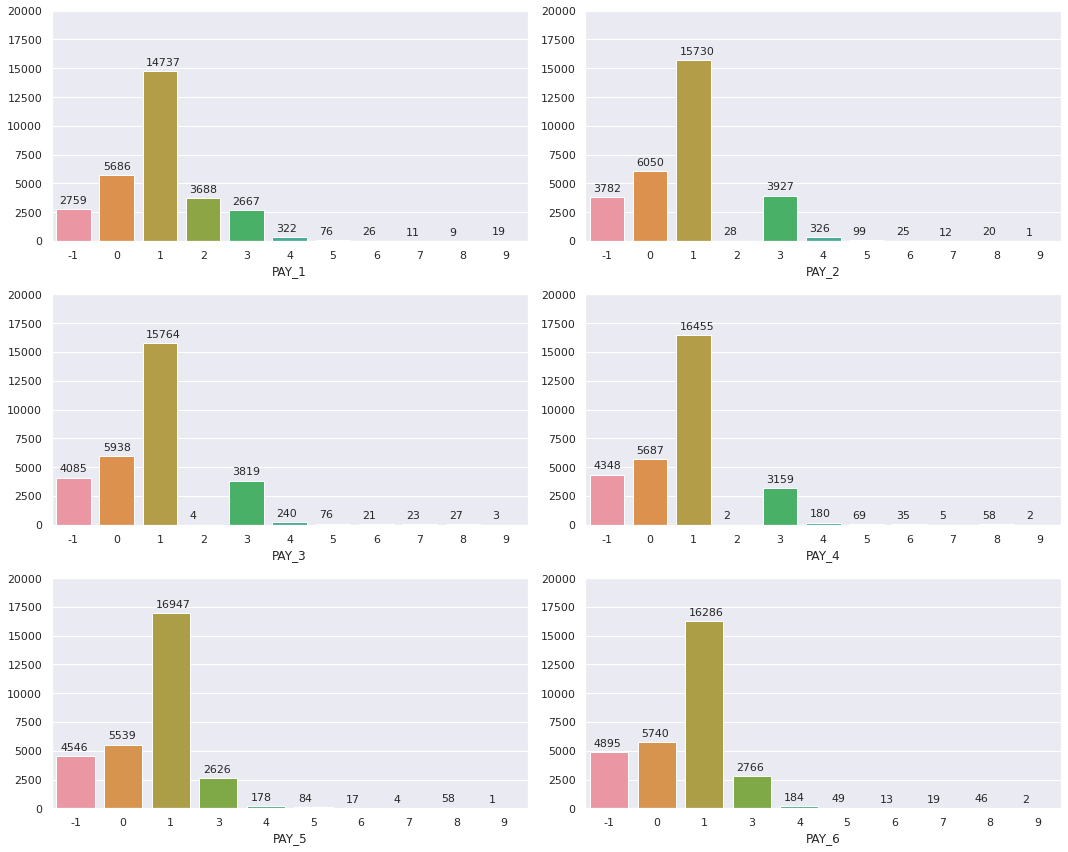

In [ ]:
#Looking at pay amount distriboutions
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col])
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

Here we have the number of observations within each time period that are delayed for the corresponding number of months. Like we saw when we visualized our target variable, the bulk of borrowers are in the 1-3 month delinquency range. 

*   The lack of data at 2 might indicate something about the behavior of our borrowers, that they eithey can pay everythig off after 1 month of delinquency or are "too far gone" at that point"



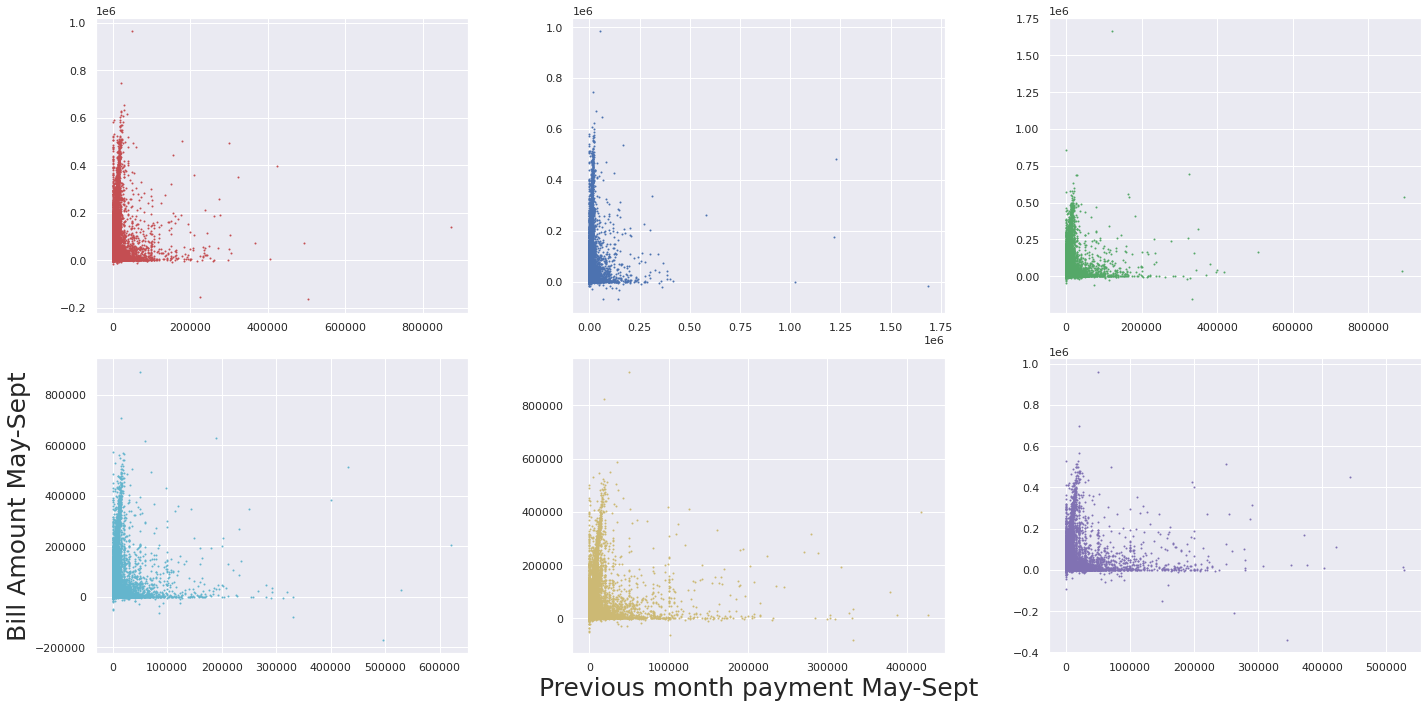

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL4, c='c', s=1)
plt.ylabel("Bill Amount May-Sept", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL5, c='y', s=1)
plt.xlabel("Previous month payment May-Sept", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL6, c='m', s=1)

plt.show()

We see that high bill amounts are associated with low payments towards that balance. There are very few in the distribution with high balances that are also making payments in full. We also see some towards the bottom right getting caught up on their balance by paying off more than their bill amount 

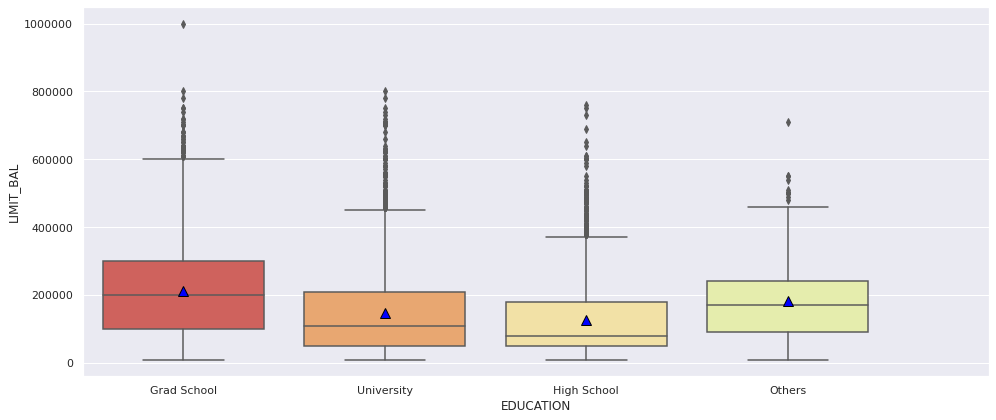

In [ ]:
#looking at education distribution
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, showmeans=True, 
            meanprops={"markerfacecolor":"blue",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others'], fontsize = 11)

plt.show()


Here we can see the that education may not have a strong impact on the credit limit provided to borrowers. While graduate-educated borrowers have a higher limit on average, at about th 75th percentile of each other class, we also see a large number of outliers on the higher end of credit limit across all levels of education


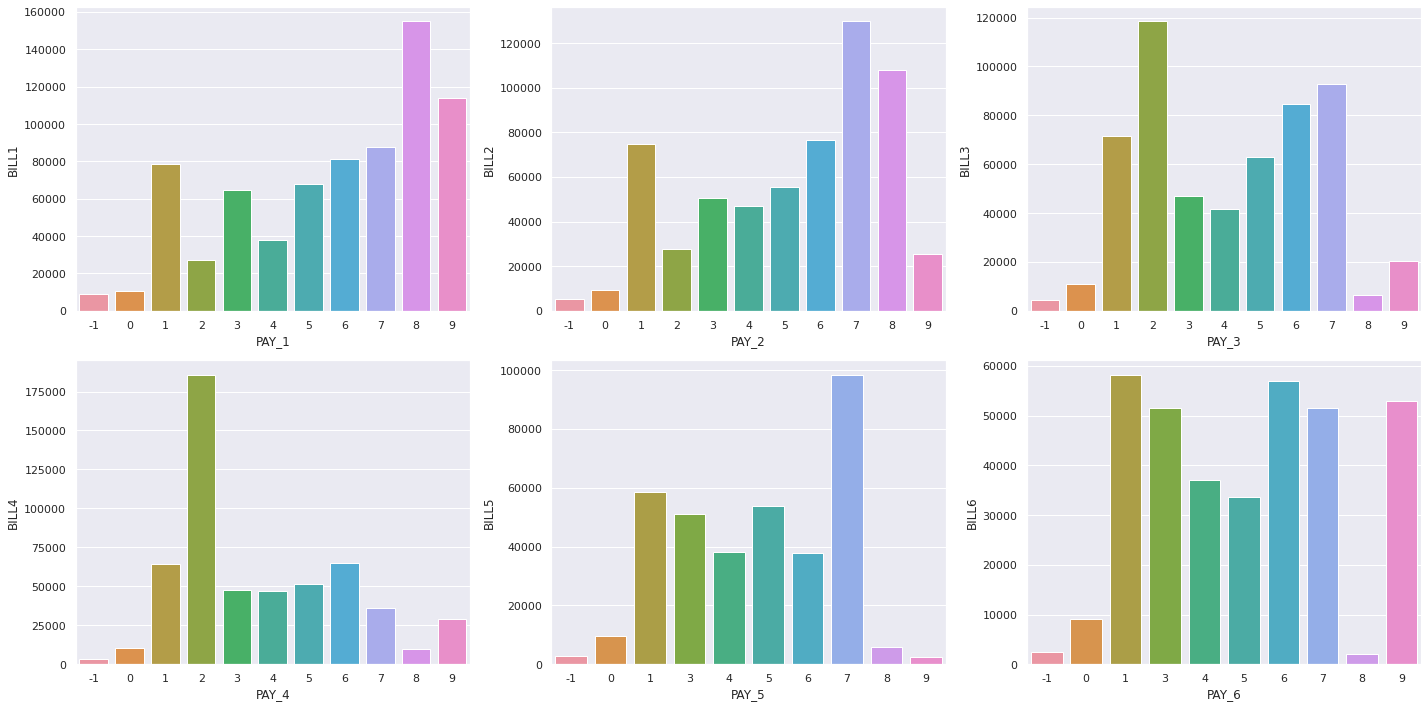

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
sns.barplot(data=df , x = "PAY_1" , y = "BILL1",ci=None)

plt.subplot(232)
sns.barplot(data=df , x = "PAY_2" ,y = "BILL2", ci=None)

plt.subplot(233)
sns.barplot(data=df , x = "PAY_3" , y ="BILL3", ci=None )

plt.subplot(234)
sns.barplot(data=df , x = "PAY_4" , y ="BILL4", ci=None )

plt.subplot(235)
sns.barplot(data=df , x = "PAY_5" , y ="BILL5", ci=None)

plt.subplot(236)
sns.barplot(data=df , x = "PAY_6" , y ="BILL6",ci=None)

Here we're lookign at the total outstanding bill amount by deliquent repayment category across our observation period. As we move from right to left, and bottom to top, our borrowers are moving forward in time. 

It's hard to draw many conclusions from this chart alone, excpet that accounts that are already delinquent are still able to drastically increase bill amount. Othrwise, we would see a consistent bill amount in each category moving 1 month ahead. 


Overall, our conclusion is that a borrower's delinngquency 

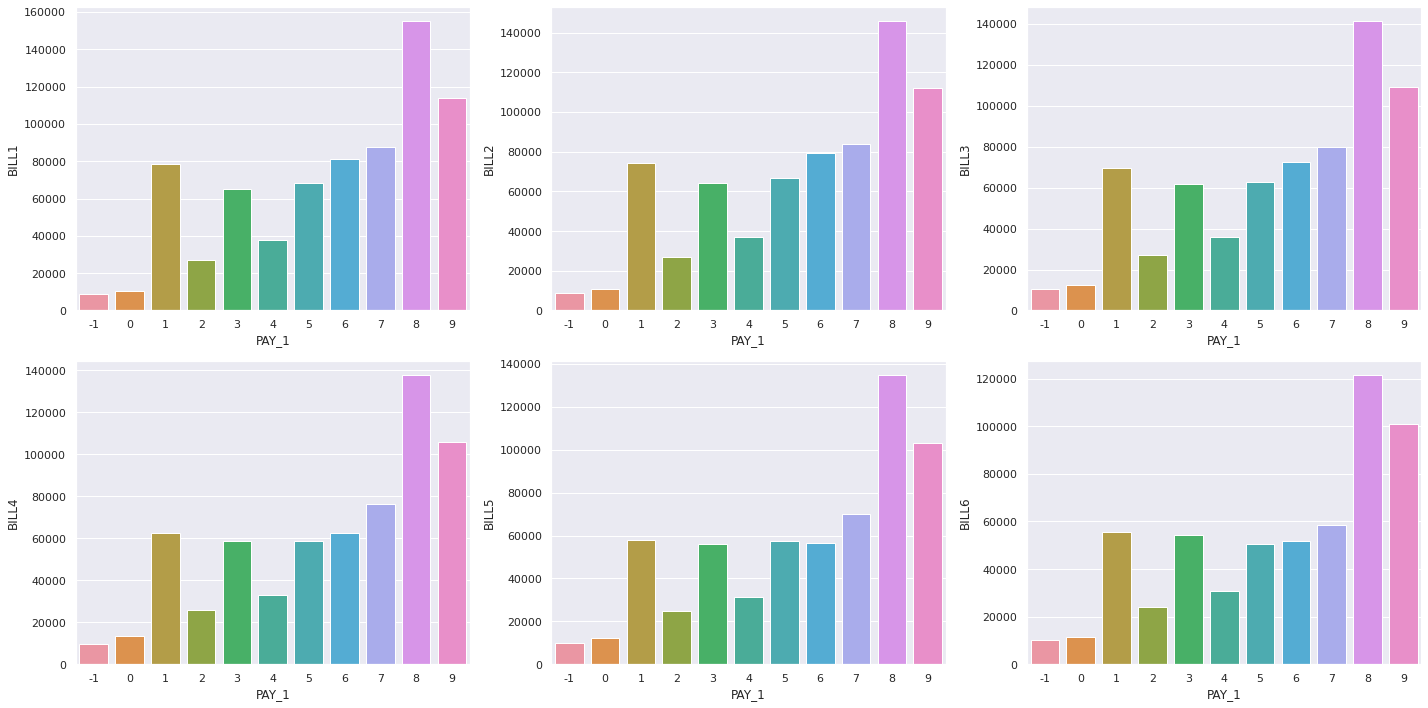

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
sns.barplot(data=df , x = "PAY_1" , y = "BILL1",ci=None)

plt.subplot(232)
sns.barplot(data=df , x = "PAY_1" ,y = "BILL2", ci=None)

plt.subplot(233)
sns.barplot(data=df , x = "PAY_1" , y ="BILL3", ci=None )

plt.subplot(234)
sns.barplot(data=df , x = "PAY_1" , y ="BILL4", ci=None )

plt.subplot(235)
sns.barplot(data=df , x = "PAY_1" , y ="BILL5", ci=None)

plt.subplot(236)
sns.barplot(data=df , x = "PAY_1" , y ="BILL6",ci=None)

In order to look at whether the repayment status is related to or affects the bill amount, we looked at the bill amounts compared to each payment status. One example of those plots is shown here. It seems that it does not, that should be investigated further as a part of the analysis.

In [42]:
%%shell
jupyter nbconvert --to html /content/homework_3_ML.ipynb

[NbConvertApp] WARNING | pattern '/content/homework_3_ML' matched no files
[NbConvertApp] WARNING | pattern '.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.

CalledProcessError: ignored